In [1]:
library(AnnotationDbi)
library(org.Hs.eg.db)

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Loading required package: Biobase

Welcome to Bioconductor

    Vignettes contain

In [2]:
library(LandSCENT)

Warning message:
“multiple methods tables found for ‘which’”
Warning message:
“no DISPLAY variable so Tk is not available”


In [3]:
library(Seurat)

Attaching SeuratObject



In [4]:
data(net13Jun12.m)

In [5]:
load(file="0711-ob.integratve-7samples.Rda")

In [6]:
allPC3<-ob.integrated

In [7]:
allPC3

An object of class Seurat 
22868 features across 14081 samples within 2 assays 
Active assay: integrated (2000 features, 2000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [8]:
expMat<-GetAssayData(allPC3,slot="data")

In [9]:
anno.v <- mapIds(org.Hs.eg.db, keys = rownames(expMat), keytype = "SYMBOL", 
                 column = "ENTREZID", multiVals = "first")

'select()' returned 1:1 mapping between keys and columns



In [10]:
unique_anno.v <- unique(anno.v)
example_New.m <- matrix(0, nrow = length(unique_anno.v), ncol = dim(expMat)[2])

In [11]:
for (i in seq_len(length(unique_anno.v))) {
  tmp <- expMat[which(anno.v == unique_anno.v[i]) ,]
  if (!is.null(dim(tmp))) {
    tmp <- colSums(tmp) / dim(tmp)[1]
  }
  example_New.m[i ,] <- example_New.m[i ,] + tmp
}
rownames(example_New.m) <- unique_anno.v
colnames(example_New.m) <- colnames(expMat)
example_New.m <- example_New.m[-which(rownames(example_New.m) %in% NA) ,]
Example.m <- example_New.m

In [12]:
Example.m[which(Example.m==0)]<-0.1

In [13]:
Integration.l <- DoIntegPPI(exp.m = Example.m, ppiA.m = net13Jun12.m)
str(Integration.l)

Warning message in if (data.class == "SingleCellExperiment") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (data.class == "CellDataSet") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (data.class == "SingleCellExperiment") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (data.class == "CellDataSet") {:
“the condition has length > 1 and only the first element will be used”


List of 3
 $ expMC: num [1:651, 1:14081] 0.00106 0.03288 0.10299 0.0692 0.04464 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:651] "4173" "4174" "10657" "5111" ...
  .. ..$ : chr [1:14081] "AAACCTGAGTTTAGGA-1_1" "AAACCTGCAAGCGTAG-1_1" "AAACCTGCACCTGGTG-1_1" "AAACCTGGTCTGCCAG-1_1" ...
 $ adjMC: num [1:651, 1:651] 0 1 0 1 1 1 1 0 0 0 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:651] "4173" "4174" "10657" "5111" ...
  .. ..$ : chr [1:651] "4173" "4174" "10657" "5111" ...
 $ data : num [1:1776, 1:14081] 0.97 1.908 0.268 3.825 2.228 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:1776] "3507" "3493" "3501" "3539" ...
  .. ..$ : chr [1:14081] "AAACCTGAGTTTAGGA-1_1" "AAACCTGCAAGCGTAG-1_1" "AAACCTGCACCTGGTG-1_1" "AAACCTGGTCTGCCAG-1_1" ...


In [14]:
SR.o <- CompSRana(Integration.l, local = TRUE, mc.cores = 20)

In [15]:
phenoExample.v<-allPC3@meta.data$seurat_clusters

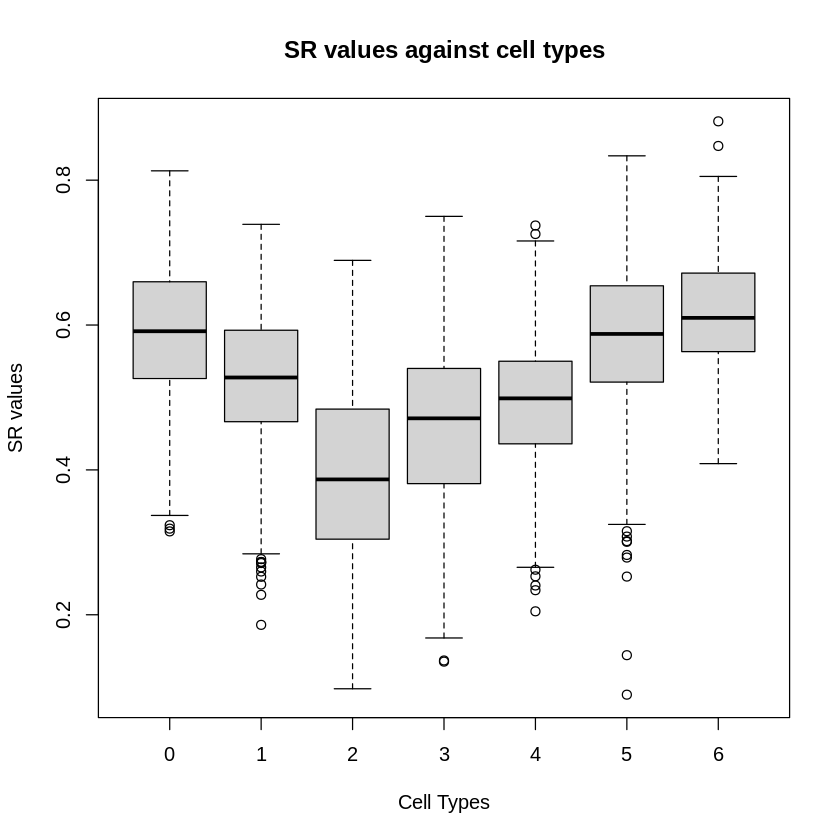

In [16]:
boxplot(SR.o$SR ~ phenoExample.v, main = "SR values against cell types", xlab = "Cell Types", ylab = "SR values")

In [17]:
mydata<-data.frame(SR.o$SR,phenoExample.v)

In [18]:
mydata

SR.o.SR,phenoExample.v
<dbl>,<fct>
0.4574607,1
0.4924131,0
0.4839835,0
0.4490980,0
0.4308457,0
0.2049904,3
0.3173886,2
0.4132355,0
0.5505797,3


In [19]:
options(repr.plot.height=5,repr.plot.width=8)

Loading required package: ggplot2



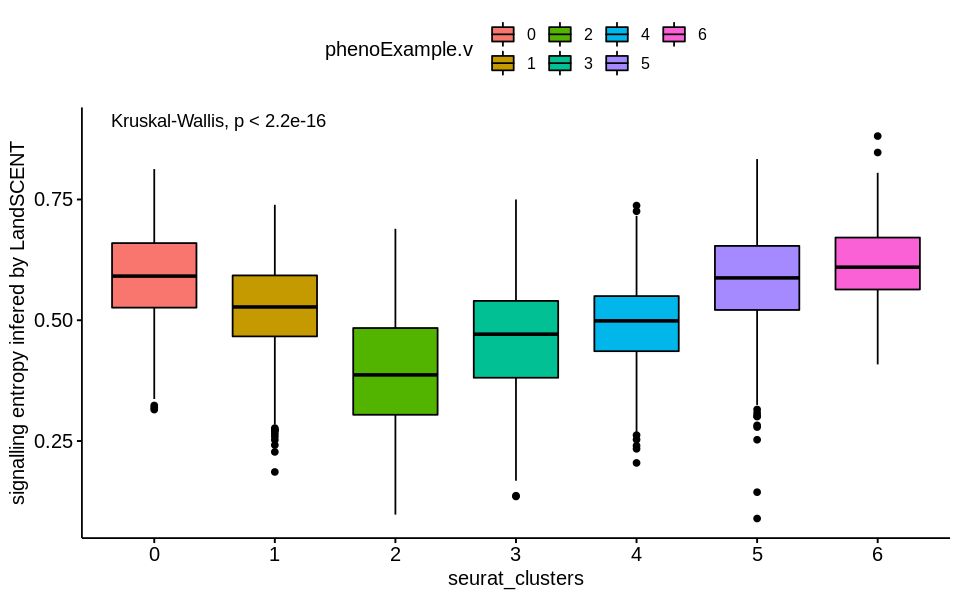

In [20]:
library(ggpubr)
library(RColorBrewer)
ggboxplot(mydata, x="phenoExample.v", y="SR.o.SR", fill ="phenoExample.v",xlab = "seurat_clusters", ylab = "signalling entropy infered by LandSCENT")+
  stat_compare_means(label.y = 0.9)

In [21]:
ggsave("fig.2.4.pdf",height=5,width=8)
dev.off()

null device 
          1

In [22]:
InferPotency.o <- InferPotency(SR.o)

[1] "Fit Gaussian Mixture Model to Signaling Entropies"
[1] "Identified 3 potency states"


In [23]:
InferPotency.o <- InferPotency(SR.o, pheno.v = phenoExample.v)

[1] "Fit Gaussian Mixture Model to Signaling Entropies"
[1] "Identified 3 potency states"
[1] "Compute Shannon (Heterogeneity) Index for each Phenotype class"
[1] "Done"


In [24]:
InferPotency.o$distPSPH

       ordpotS.v
pheno.v    1    2    3
      0 3002 3932  251
      1  465 1626  479
      2  126  453 1181
      3   75  500  400
      4   62  548  235
      5  188  243   55
      6   93  146   21

In [25]:
InferLandmark.o <- InferLandmark(InferPotency.o, pheno.v = phenoExample.v,
                                 reduceMethod = "PCA", clusterMethod = "PAM",
                                 k_pam = 2)

[1] "Now estimating number of significant components of variation in scRNA-Seq data"
[1] "Centering and scaling matrix"
[1] "Done, now performing SVD"
[1] "Using Fast IRLBA to approximate 65 top singular values"
[1] "Done"
[1] "Number of significant components = 65"
[1] "Do dimension reduction via PCA"
[1] "Identifying co-expression clusters via PAM"
[1] "Inferred 2 clusters"
[1] "Now identifying landmarks (potency co-expression clusters)"
[1] "Identified 5 Landmarks"
[1] "Constructing expression medoids of landmarks"
[1] "Inferring dependencies/trajectories/transitions between landmarks"


In [26]:
InferLandmark.o <- InferLandmark(InferPotency.o, pheno.v = phenoExample.v,
                                 reduceMethod = "PCA", clusterMethod = "dbscan",
                                 eps_dbscan = 10, minPts_dbscan = 5)

[1] "Now estimating number of significant components of variation in scRNA-Seq data"
[1] "Centering and scaling matrix"
[1] "Done, now performing SVD"
[1] "Using Fast IRLBA to approximate 65 top singular values"
[1] "Done"
[1] "Number of significant components = 65"
[1] "Do dimension reduction via PCA"
[1] "Identifying co-expression clusters via dbscan"
[1] "Inferred 1 clusters"
[1] "Now identifying landmarks (potency co-expression clusters)"
[1] "Identified 3 Landmarks"
[1] "Constructing expression medoids of landmarks"
[1] "Inferring dependencies/trajectories/transitions between landmarks"


In [27]:
InferLandmark.o$InferLandmark.l$distPHLM

       psclID.v
pheno.v PS1-CL1 PS2-CL1 PS3-CL1
      0    3002    3932     251
      1     465    1626     479
      2     126     453    1181
      3      75     500     400
      4      62     548     235
      5     188     243      55
      6      93     146      21

In [28]:
phenoExample.v<-allPC3@meta.data$orig.ident

In [29]:
mydata<-data.frame(SR.o$SR,phenoExample.v)

In [30]:
mydata

SR.o.SR,phenoExample.v
<dbl>,<chr>
0.4574607,MGUSPC2
0.4924131,MGUSPC2
0.4839835,MGUSPC2
0.4490980,MGUSPC2
0.4308457,MGUSPC2
0.2049904,MGUSPC2
0.3173886,MGUSPC2
0.4132355,MGUSPC2
0.5505797,MGUSPC2


In [31]:
options(repr.plot.height=5,repr.plot.width=8)

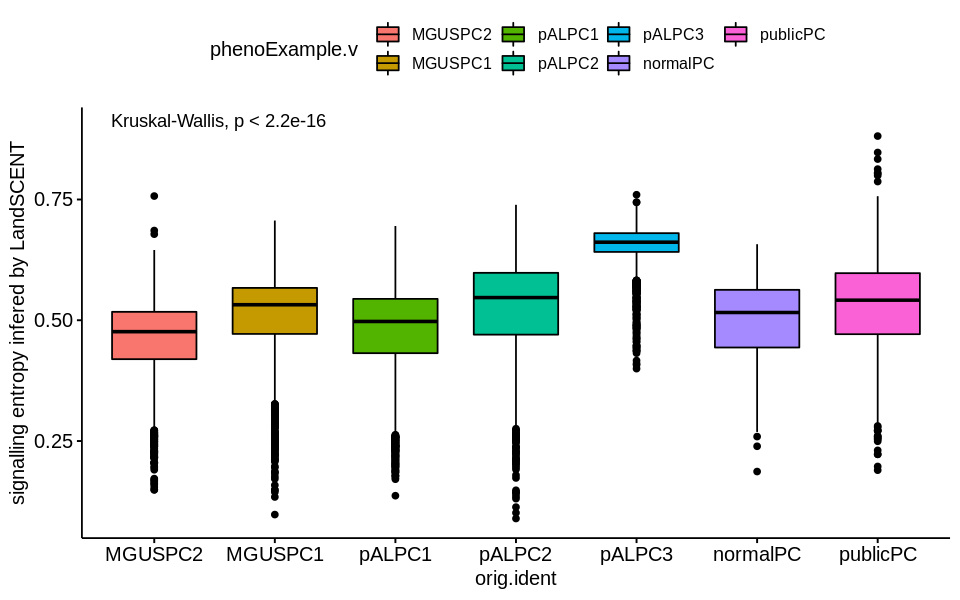

In [32]:
library(ggpubr)
library(RColorBrewer)
ggboxplot(mydata, x="phenoExample.v", y="SR.o.SR", fill ="phenoExample.v",xlab = "orig.ident", ylab = "signalling entropy infered by LandSCENT")+
  stat_compare_means(label.y = 0.9)

In [33]:
mydata<-data.frame(SR.o$SR,phenoExample.v)

In [34]:
mydata

SR.o.SR,phenoExample.v
<dbl>,<chr>
0.4574607,MGUSPC2
0.4924131,MGUSPC2
0.4839835,MGUSPC2
0.4490980,MGUSPC2
0.4308457,MGUSPC2
0.2049904,MGUSPC2
0.3173886,MGUSPC2
0.4132355,MGUSPC2
0.5505797,MGUSPC2


In [35]:
table(mydata$phenoExample.v==allPC3@meta.data$orig.ident)


 TRUE 
14081 

In [36]:
allPC3@meta.data$landscent<- mydata$SR.o.SR

In [37]:
options(repr.plot.height=5,repr.plot.width=10)


Attaching package: ‘cowplot’


The following object is masked from ‘package:ggpubr’:

    get_legend




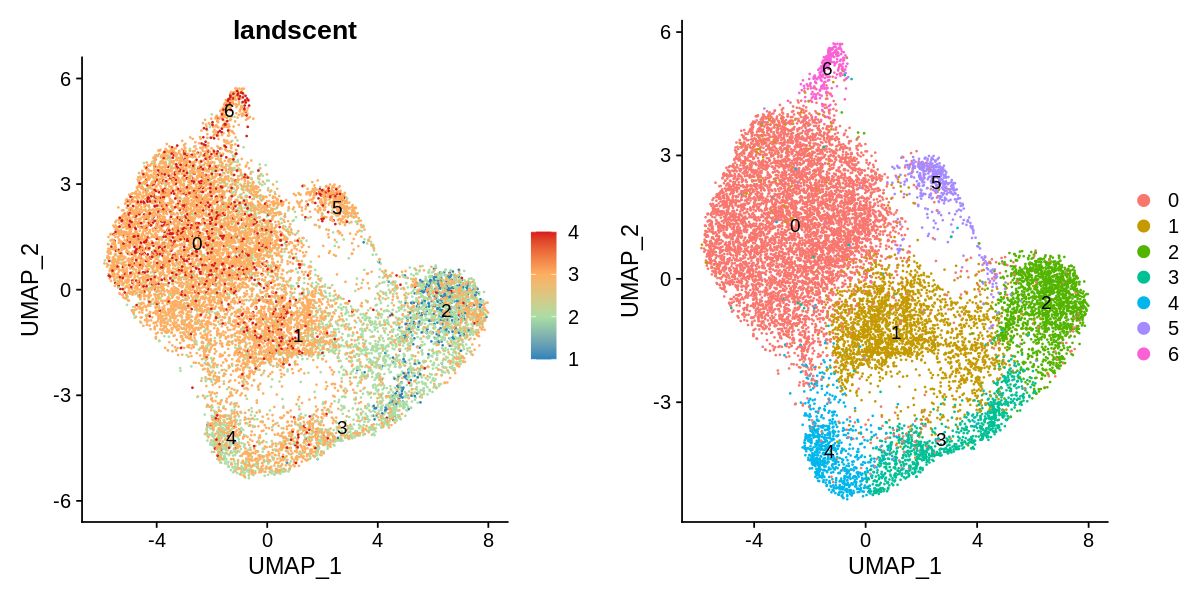

In [38]:
library(cowplot)
library(RColorBrewer)
p1 = FeaturePlot(allPC3, features='landscent', label=T, reduction = 'umap',cols=rev(brewer.pal(4,'Spectral')))
p2 = DimPlot(allPC3, reduction = 'umap', label=T)
plot_grid(p1,p2)